# Predicting Profit of 50 Startup Companies

## Setup Environment

In [27]:
import pandas as pd
import numpy as np

import random as rand
import math

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

## Import Data

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan%20/Regression/master/Startups_Data.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Visualize Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

Box plot of R&D Spend, Administration, and Marketing Spend

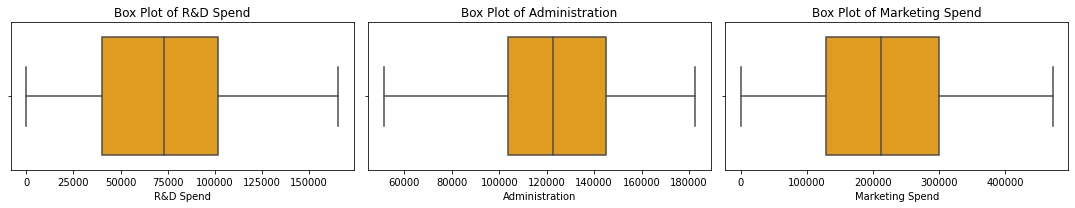

In [7]:
plt.figure(figsize=(20, 3))

for i, col in zip(range(1, 4), df.columns):
    plt.subplot(1, 4, i)
    sns.boxplot(x=col, data=df, color='orange')
    plt.title(f"Box Plot of {col}")
    plt.tight_layout()
plt.show()

Distribution of R&D Spend, Administration, and Marketing Spend

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

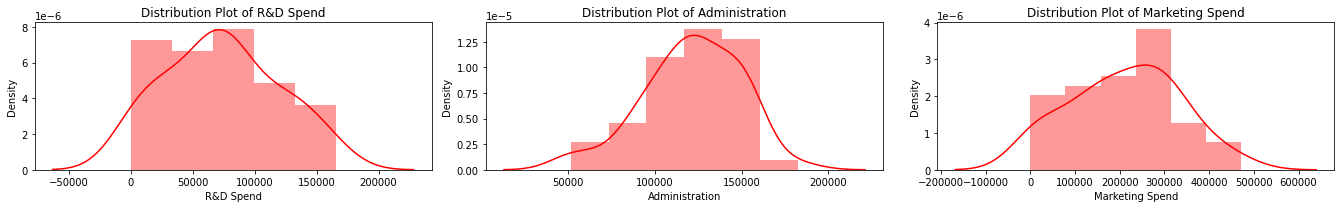

In [8]:
plt.figure(figsize=(25, 3))

for i, col in zip(range(1, 4), df.columns):
    plt.subplot(1, 4, i)
    sns.distplot(df[col], color='red')
    plt.title(f"Distribution Plot of {col}")
    plt.tight_layout()

Box plot and Distribution plot of Profit

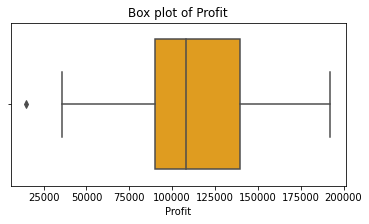

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


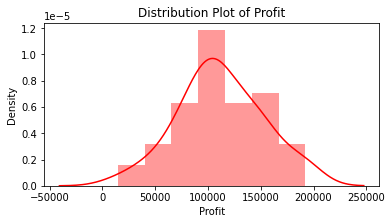

In [9]:
plt.figure(figsize=(6, 3))

sns.boxplot(x='Profit', data=df, color='orange')
plt.title('Box plot of Profit')
plt.show()

plt.figure(figsize=(6, 3))

sns.distplot(df['Profit'], color='red')
plt.title('Distribution Plot of Profit')
plt.show()

Ternyata terdapat outlier di dalam kolom profit kita. Ini outlier kita:

In [10]:
df[df['Profit'] < 25000]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


Ternyata, perusahaan ini memiliki Profit yang kecil, dengan cost yang dia keluarkan untuk Administration dan Marketing tergolong besar, tetapi tidak mengeluarkan cost apapun untuk R&D. Untuk menentukan harus bertindak apa terhadap outlier ini, saya mencoba melihat perusahaan lain yang memiliki Profit yang di bawah 100000.

In [11]:
df[df['Profit'] < 100000]

,R&D Spend,Administration,Marketing Spend,State,Profit
30,61994.48,115641.28,91131.24,Florida,99937.59
31,61136.38,152701.92,88218.23,New York,97483.56
32,63408.86,129219.61,46085.25,California,97427.84
33,55493.95,103057.49,214634.81,Florida,96778.92
34,46426.07,157693.92,210797.67,California,96712.80
35,46014.02,85047.44,205517.64,New York,96479.51
36,28663.76,127056.21,201126.82,Florida,90708.19
37,44069.95,51283.14,197029.42,California,89949.14
38,20229.59,65947.93,185265.10,New York,81229.06
39,38558.51,82982.09,174999.30,California,81005.76


Setelah melihat data di atas, perusahaan startup dengan profit di bawah 100,000, termasuk outlier kita, mereka terlihat spend uang yang banyak di R&D Spend dan juga Marketing Spend, dan mereka bisa mendapatkan profit di atas 70,000 mendekati 100,000. Untuk perusahaan startup yang hanya spend mendekati 0 di bagian R&D Spend dan Marketing spend, mereka hanya bisa mendapatkan profit yang sedikit, di bawah 50,000. Tetapi, untuk outlier ini (index 49), walaupun dia spend 0 di R&D Spend, tetapi dia spend banyak (45,173.06) di bagian Marketing Spend. Seharusnya, dia bisa mendapatkan profit setidaknya lebih dari 30,000. Tetapi disini, dia hanya mendapatkan 14,681.40.

Di bidang bisnis, kejadian ini menurut saya mungkin bisa terjadi, dimana perusahaan tidak terlalu menghabiskan uang di bagian R&D, tetapi mereka menghabiskan banyak di Marketing. Tetapi walaupun begitu, mungkin produk mereka tidak terlalu berkualitas karena tidak menghabiskan banyak di R&D, sehingga mungkin saja profit yang mereka raup sangat kecil, walaupun sudah spend banyak untuk marketing.

Kesimpulannya, saya **tidak akan menghapus** outlier ini, dan menyimpannya di dataset.

Tren antara tiap variabel numerik dengan **Profit**:

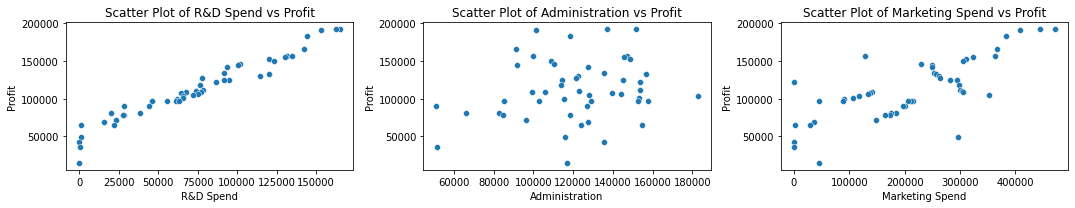

In [12]:
plt.figure(figsize=(20, 3))

for i, col in zip(range(1, 4), df.columns):
    plt.subplot(1, 4, i)
    sns.scatterplot(x=col, y='Profit', data=df)
    plt.title(f"Scatter Plot of {col} vs Profit")
    plt.tight_layout()

## Correlation Analysis

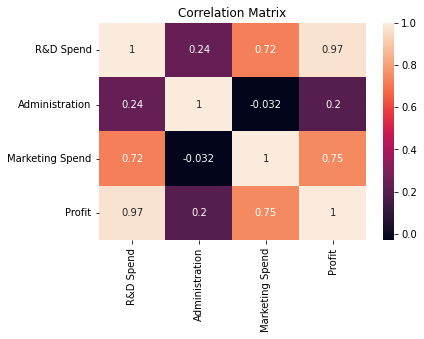

In [15]:
sns.heatmap(data=df.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

Dari sini, kita bisa melihat bahwa:
- **Marketing Spend** dan **R&D Spend** dua-duanya memiliki korelasi yang tinggi dengan **Profit** (0.72 dan 0.97).
- **Administration** memiliki korelasi yang rendah dengan profit (0.2). Maka, kita bisa **mempertimbangkan** untuk membuang variabel tersebut.
- **Marketing Spend** memiliki korelasi yang tinggi dengan **R&D Spend**, maka kita harus membuang salah satu karena kita tidak ingin adanya *multicollinearity* di dataset kita. *Multicollinearity* adalah sebuah peristiwa dimana 2 independent variabel memiliki korelasi yang kuat. Ini menjadi masalah karena akan menghilangkan *statistical significance* dari variabel tersebut. Jadi, kita akan membuang variabel **Marketing Spend** karena **R&D Spend** memiliki korelasi yang lebih kuat dengan **Profit**

### ANOVA test for State

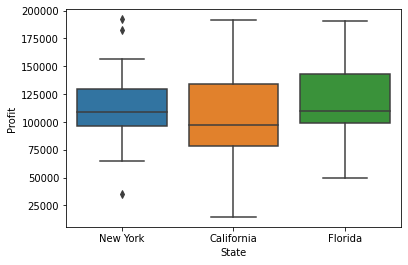

In [13]:
sns.boxplot(x='State', y='Profit', data=df)
plt.show()

In [14]:
import scipy.stats as stats

profit_ca = df[df['State'] == 'California']['Profit']
profit_ny = df[df['State'] == 'New York']['Profit']
profit_fl = df[df['State'] == 'Florida']['Profit']

# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(profit_ca, profit_ny, profit_fl)
print(fvalue, pvalue)

0.5747908867225178 0.5667290310967406


## Feature Selection

Dari analisis di atas, saya mendapatkan bahwa:
- Saya akan membuang **Marketing Spend** karena memiliki korelasi yang kuat dengan **R&D Spend**
- Saya akan membuang **Administration** karena memiliki korelasi yang cukup rendah dengan **Profit**. Kenapa tidak membuang **State** karena lokasi perusahaan juga bisa berpengaruh terhadap profit yang diraup sebuah perusahaan, bukan cost yang dikeluarkan untuk administrasi.

In [18]:
temp = df.drop(['Marketing Spend', 'Administration'], axis=1)
temp.head()

,R&D Spend,State,Profit
0,165349.20,New York,192261.83
1,162597.70,California,191792.06
2,153441.51,Florida,191050.39
3,144372.41,New York,182901.99
4,142107.34,Florida,166187.94


**State** merupakan categorical data, jadi saya akan melakukan One-Hot Encoding.

In [19]:
oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

state = pd.DataFrame(oh_encoder.fit_transform(temp[['State']]))

state.index = temp['State'].index
state.columns = ['California', 'Florida', 'New York']

dropped_df = temp.drop('State', axis=1)

oh_df = pd.concat([dropped_df, state], axis=1)
oh_df.head()

,R&D Spend,Profit,California,Florida,New York
0,165349.20,192261.83,0.0,0.0,1.0
1,162597.70,191792.06,1.0,0.0,0.0
2,153441.51,191050.39,0.0,1.0,0.0
3,144372.41,182901.99,0.0,0.0,1.0
4,142107.34,166187.94,0.0,1.0,0.0


Hasilnya, kita memiliki dummy variable California, Florida, New York. Tetapi, muncul sebuah problem yaitu Dummy Variable Trap.
> The Dummy variable trap is a scenario where there are attributes that are highly correlated (Multicollinear) and one variable predicts the value of others. When we use one-hot encoding for handling the categorical data, then one dummy variable (attribute) can be predicted with the help of other dummy variables. Hence, one dummy variable is highly correlated with other dummy variables. Using all dummy variables for regression models leads to a dummy variable trap. So, the regression models should be designed to exclude one dummy variable.

Sumber: [ML | Dummy variable trap in Regression Models](https://www.geeksforgeeks.org/ml-dummy-variable-trap-in-regression-models/)

Maka, untuk menghindari itu, saya akan drop salah satu dummy variabel, yang memiliki 1 yang paling banyak, atau yang muncul paling banyak di dataset kita.

In [20]:
print('California:', oh_df[oh_df['California'] == 1]['California'].count())
print('Florida:', oh_df[oh_df['Florida'] == 1]['Florida'].count())
print('New York:', oh_df[oh_df['New York'] == 1]['New York'].count())

California: 17
Florida: 16
New York: 17


In [21]:
# Yang muncul paling banyak adalah 0 dan 2, saya akan menghapus yang 0
final_df = oh_df.drop('California', axis=1)
final_df.head()

,R&D Spend,Profit,Florida,New York
0,165349.20,192261.83,0.0,1.0
1,162597.70,191792.06,0.0,0.0
2,153441.51,191050.39,1.0,0.0
3,144372.41,182901.99,0.0,1.0
4,142107.34,166187.94,1.0,0.0


## Split Data Train-Test

In [22]:
# Biar tidak error
final_df.columns = ['R&D Spend', 'Profit', 'Florida', 'New York']

In [23]:
X = final_df.drop('Profit', axis=1)
X.shape

(50, 3)

In [24]:
y = final_df['Profit']
y.shape

(50,)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print('Train size:', X_train.shape)
print('Test size:', X_test.shape)

Train size: (40, 3)
Test size: (10, 3)


In [ ]:
X_train

,R&D Spend,Florida,New York
12,93863.75,1.0,0.0
4,142107.34,1.0,0.0
37,44069.95,0.0,0.0
8,120542.52,0.0,1.0
3,144372.41,0.0,1.0
6,134615.46,0.0,0.0
41,27892.92,1.0,0.0
46,1315.46,1.0,0.0
47,0.00,0.0,0.0
15,114523.61,0.0,1.0


## Gradient Descent From Scratch

Sebelum kita training, kita lakukan standardisasi terhadap data training.

In [244]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_transform=sc.fit_transform(X_train)

In [245]:
class gradient_descent:
  def __init__(self, nvar):
    self.intercept = 0
    self.theta = np.random.randn(nvar)

  def predict(self, X, theta, intercept):
    return np.array(intercept + np.dot(X, theta))

  def update_theta(self, X, y, y_pred, alpha):
    deriv_theta = (2/len(y)) * np.dot((y_pred - y), X)
    return self.theta - (alpha * deriv_theta)

  def update_intercept(self, y, y_pred, alpha):
    deriv_intercept = (2/len(y)) * np.sum(y_pred - y)
    return self.intercept - (alpha * deriv_intercept)

  def get_MSE(self, y, y_pred):
    return np.sum((y - y_pred)**2) / len(y)

  def fit(self, X, y, epochs, alpha):
    loss = []
  
    for i in range(epochs):
      y_pred = self.predict(X, self.theta, self.intercept)
      self.theta = self.update_theta(X, y, y_pred, alpha)
      self.intercept = self.update_intercept(y, y_pred, alpha)
      loss.append(self.get_MSE(y, y_pred))
      # if i % 100 == 0:
      #   print(f'[{i}] Loss: {loss[i]}')

    return loss

In [246]:
all_loss = []

for alpha in [0.0005, 0.001, 0.005, 0.01]:
  model = gradient_descent(X.shape[1])
  epochs = 5000
  loss = model.fit(X_transform, y_train, epochs, alpha)

  all_loss.append([alpha, loss])

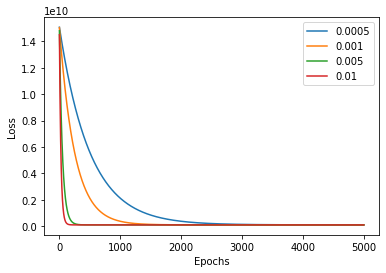

In [247]:
# View semua proses penurunan loss untuk alpha yang berbeda
for i in range(len(all_loss)):
  plt.plot(np.arange(1, epochs), all_loss[i][1][1:], label=all_loss[i][0])

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [297]:
# lakukan sekali lagi dengan alpha yang paling cepat converge
model = gradient_descent(X.shape[1])
epochs = 5000
_ = model.fit(X_transform, y_train, epochs, 0.01)

### Predict and Evaluate

Sekarang, kita akan melakukan prediksi terhadap **test data**.


In [298]:
print(f'Intercept: {model.intercept}')
print(f'Theta: {model.theta}')

Intercept: 115651.72049999965
Theta: [40258.45966301  1121.55225026   260.06670118]


In [299]:
w = model.theta
b = model.intercept

In [300]:
def final_predict(X):
  return b + np.dot(X, w)

In [301]:
y_pred = final_predict(sc.transform(X_test))
compare = pd.DataFrame({
    'y_pred': y_pred,
    'y_true': y_test
})

compare.head()

,y_pred,y_true
13,126824.587601,134307.35
39,81340.583754,81005.76
30,103641.169815,99937.59
45,49925.466388,64926.08
17,129648.147287,125370.37


### Final MSE Score

In [302]:
mean_squared_error(y_test, y_pred)

63144831.835769415

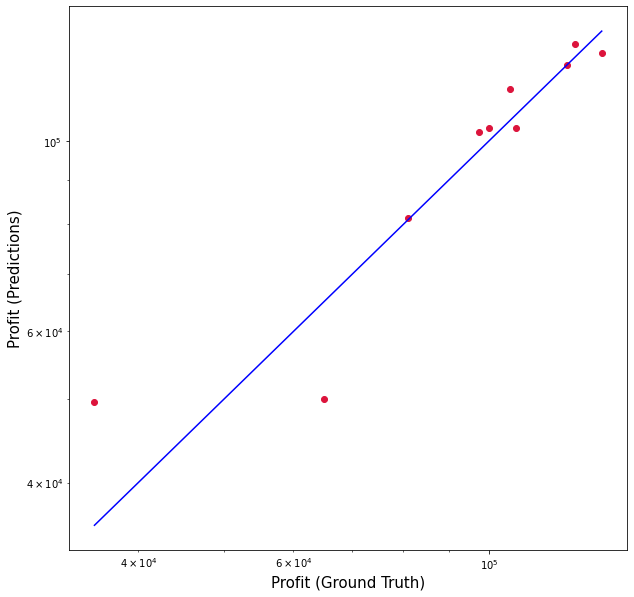

In [254]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, c='crimson')

plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test), max(y_pred))
p2 = min(min(y_test), min(y_pred))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Profit (Ground Truth)', fontsize=15)
plt.ylabel('Profit (Predictions)', fontsize=15)
plt.show()

## Linear Regression with Scikit-Learn

### Modelling

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

### Predict and Evaluate

Sekarang, kita akan melakukan prediksi terhadap **test data**.

In [ ]:
y_pred = model.predict(X_test)
print(y_test.head())
print(pd.Series(y_pred).head())

13    134307.35
39     81005.76
30     99937.59
45     64926.08
17    125370.37
Name: Profit, dtype: float64
0    126824.587601
1     81340.583754
2    103641.169815
3     49925.466388
4    129648.147287
dtype: float64


In [ ]:
print("Model's weights:")
print("w0 =", model.intercept_)
print("w1 =", model.coef_[0])
print("w2 =", model.coef_[1])
print("w3 =", model.coef_[2])

Model's weights:
w0 = 48518.79695502977
w1 = 0.8512203090535349
w2 = 2351.412435069603
w3 = 555.2533430234541


In [ ]:
model.score(X_test, y_test)

0.9220234009607919

### Final MSE Score


In [ ]:
mean_squared_error(y_test, y_pred)

63144831.835768856

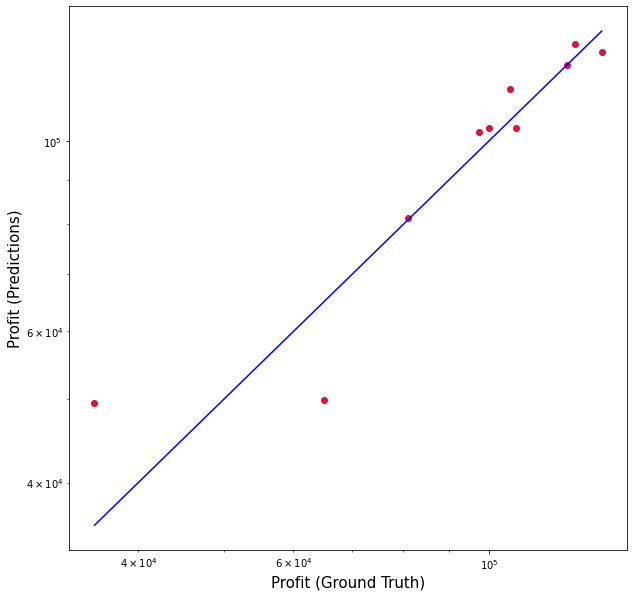

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, c='crimson')

plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test), max(y_pred))
p2 = min(min(y_test), min(y_pred))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Profit (Ground Truth)', fontsize=15)
plt.ylabel('Profit (Predictions)', fontsize=15)
plt.show()

# Conclusion

Bisa dilihat dari MSE yang didapatkan dari gradient descent dan menggunakan library Scikit-Learn hampir mirip. 

Dari gradient descent, kita mendapatkan weight sebagai berikut:

- w0 = 115651.72049999965
- w1 = 40258.45966301
- w2 = 1121.55225026 
- w3 = 260.06670118

Dan kita mendapatkan MSE sebesar 63144831.835769415.

Dari menggunakan model LinearRegression dari library Scikit-Learn, kita mendapatkan weight sebagai berikut:
- w0 = 48518.79695502977
- w1 = 0.8512203090535349
- w2 = 2351.412435069603
- w3 = 555.2533430234541

Dan kita mendapatkan MSE sebesar 63144831.835768856.

# Export to CSV

In [ ]:
oh_df.to_csv('Encoded_Startups_Data.csv')

In [ ]:
train = pd.concat([X_train, y_train], axis=1)
train.to_csv('Training_data.csv')

test = pd.concat([X_test, y_test], axis=1)
test.to_csv('Test_data.csv')